# Analýza dat a vizualizace v Pythonu
## Téma: Demografický vývoj v ČR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Načtení datových sad

In [2]:
url_demograf = "https://data.csu.gov.cz/opendata/sady/OBY01CRGEN/distribuce/csv"
# ČSÚ: Analytické ukazatele demografického vývoje ĆR

url_narozeni = "https://data.csu.gov.cz/opendata/sady/OBY03HVD/distribuce/csv"
# ĆSÚ: Narození - vybrané souhrnné údaje
# Narození podle vitality, pohlaví, legitimity a pořadí, průměrný věk matek a úhrnná plodnost

In [7]:
df_demograf = pd.read_csv(url_demograf)

In [3]:
df_narozeni = pd.read_csv(url_narozeni)

## Analýza a úprava dat

In [9]:
df_demograf.head() # základní přehled

,Ukazatel,IndicatorType,Roky,CasR2A,Území,Uz0,Hodnota
0,Úhrnná plodnost,5405W,2023,2023,Česko,CZ,1.452572
1,Úhrnná plodnost,5405W,2022,2022,Česko,CZ,1.617747
2,Úhrnná plodnost,5405W,2021,2021,Česko,CZ,1.826536
3,Úhrnná plodnost,5405W,2020,2020,Česko,CZ,1.707373
4,Úhrnná plodnost,5405W,2019,2019,Česko,CZ,1.708963


In [15]:
df_demograf.nunique() # počet unikátních hodnot ve sloupcích

Ukazatel           13
IndicatorType      13
Roky              104
CasR2A            104
Území               1
Uz0                 1
Hodnota          1141
dtype: int64

In [124]:
df_demograf.dtypes # Datové typy odpovídají povaze dat, takže není potřeba upravovat.

Ukazatel             str
IndicatorType        str
Roky               int64
CasR2A             int64
Území                str
Uz0                  str
Hodnota          float64
dtype: object

In [123]:
df_demograf["Roky"].describe() # Data jsou z let 1920-2023.

count    1161.000000
mean     1976.702842
std        28.932479
min      1920.000000
25%      1955.000000
50%      1979.000000
75%      2001.000000
max      2023.000000
Name: Roky, dtype: float64

In [16]:
df_demograf["Ukazatel"].unique() # unikátní hodnoty v klíčovém sloupci

<StringArray>
[                             'Úhrnná plodnost',
                        'Hrubá míra reprodukce',
                        'Čistá míra reprodukce',
       'Průměrný věk matek při narození dítěte',
    'Průměrný věk matek při narození 1. dítěte',
                           'Naděje dožití mužů',
                            'Naděje dožití žen',
                       'Úhrnná rozvodovost (%)',
 'Průměrná délka trvání manželství při rozvodu',
            'Tabulková prvosňatečnost mužů (%)',
             'Tabulková prvosňatečnost žen (%)',
          'Průměrný věk mužů při prvním sňatku',
           'Průměrný věk žen při prvním sňatku']
Length: 13, dtype: str

In [91]:
# Z df_demograf budu využívat pouze sloupce Ukazatel, Roky a Hodnota. 
# Sloupec "Ukazatel" si pomocí pivot rozdělím do oddělených sloupců pro jednodušší manipulaci s daty.
df_demograf_pivot = df_demograf[["Ukazatel","Roky","Hodnota"]]
df_demograf_pivot = df_demograf_pivot.pivot(index="Roky",columns="Ukazatel",values="Hodnota")
df_demograf_pivot = df_demograf_pivot.reset_index()

In [92]:
df_demograf_pivot.head() # náhled upravené tabulky

Ukazatel,Roky,Hrubá míra reprodukce,Naděje dožití mužů,Naděje dožití žen,Průměrná délka trvání manželství při rozvodu,Průměrný věk matek při narození 1. dítěte,Průměrný věk matek při narození dítěte,Průměrný věk mužů při prvním sňatku,Průměrný věk žen při prvním sňatku,Tabulková prvosňatečnost mužů (%),Tabulková prvosňatečnost žen (%),Úhrnná plodnost,Úhrnná rozvodovost (%),Čistá míra reprodukce
0,1920,1.432,47.030628,49.777447,12.571422,NaN,30.166247,NaN,NaN,NaN,NaN,2.964,5.402143,1.155
1,1921,1.467,48.822492,51.827960,11.316167,NaN,29.831867,NaN,NaN,NaN,NaN,3.035,7.374507,1.185
2,1922,1.391,49.587677,52.698522,11.269255,NaN,29.759193,NaN,NaN,NaN,NaN,2.882,8.057670,1.124
3,1923,1.340,52.879318,55.858837,11.451169,NaN,29.648330,NaN,NaN,NaN,NaN,2.768,6.461688,1.083
4,1924,1.259,52.610667,55.839984,11.563110,NaN,29.591869,NaN,NaN,NaN,NaN,2.590,6.054452,1.018


In [125]:
# Obdobně postupuji u druhého datasetu.

In [126]:
df_narozeni.head()

,Ukazatel,IndicatorType,Roky,CasR,"ČR, Reg. soudržnosti, Kraje",Uz012,Hodnota
0,Narození,4355,2000,2000,Česko,CZ,91169.0
1,Narození,4355,2000,2000,Praha,CZ01,9472.0
2,Narození,4355,2000,2000,Střední Čechy,CZ02,9962.0
3,Narození,4355,2000,2000,Jihozápad,CZ03,10576.0
4,Narození,4355,2000,2000,Severozápad,CZ04,10953.0


In [19]:
df_narozeni.nunique()

Ukazatel                         14
IndicatorType                    14
Roky                             25
CasR                             25
ČR, Reg. soudržnosti, Kraje      23
Uz012                            23
Hodnota                        5596
dtype: int64

In [22]:
df_narozeni.dtypes

Ukazatel                           str
IndicatorType                      str
Roky                             int64
CasR                             int64
ČR, Reg. soudržnosti, Kraje        str
Uz012                              str
Hodnota                        float64
dtype: object

In [127]:
df_narozeni["Roky"].describe() # Data jsou z let 2000-2024.

count    8050.00000
mean     2012.00000
std         7.21155
min      2000.00000
25%      2006.00000
50%      2012.00000
75%      2018.00000
max      2024.00000
Name: Roky, dtype: float64

In [128]:
df_narozeni["ČR, Reg. soudržnosti, Kraje"].unique() # Oproti sadě df_demograf mám zde data nejen souhrnně za ČR, ale i za jednotlivé kraje.

<StringArray>
[               'Česko',                'Praha',        'Střední Čechy',
            'Jihozápad',          'Severozápad',         'Severovýchod',
           'Jihovýchod',       'Střední Morava',      'Moravskoslezsko',
   'Hlavní město Praha',     'Středočeský kraj',       'Jihočeský kraj',
        'Plzeňský kraj',     'Karlovarský kraj',         'Ústecký kraj',
       'Liberecký kraj', 'Královéhradecký kraj',      'Pardubický kraj',
        'Kraj Vysočina',    'Jihomoravský kraj',       'Olomoucký kraj',
         'Zlínský kraj', 'Moravskoslezský kraj']
Length: 23, dtype: str

In [129]:
df_narozeni["Ukazatel"].unique()

<StringArray>
[                                 'Narození',
                             'Živě narození',
                   'Živě narození - chlapci',
                     'Živě narození - dívky',
                          'Pořadí dítěte 1.',
                          'Pořadí dítěte 2.',
                          'Pořadí dítěte 3.',
                  'Pořadí dítěte 4. a vyšší',
             'Živě narození mimo manželství',
 'Podíl živě narozených mimo manželství (%)',
                            'Mrtvě narození',
    'Průměrný věk matek při narození dítěte',
 'Průměrný věk matek při narození 1. dítěte',
                           'Úhrnná plodnost']
Length: 14, dtype: str

In [4]:
# Z df_narozeni budu využívat pouze sloupce Ukazatel, Roky a Hodnota, z toho pouze souhrnná data pro celou ČR.
# Sloupec "Ukazatel" si pomocí pivot rozdělím do oddělených sloupců pro jednodušší manipulaci s daty.
df_narozeni_pivot = df_narozeni[df_narozeni["ČR, Reg. soudržnosti, Kraje"] == "Česko"][["Ukazatel","Roky","Hodnota"]]
df_narozeni_pivot = df_narozeni_pivot.pivot(index="Roky",columns="Ukazatel",values="Hodnota")
df_narozeni_pivot = df_narozeni_pivot.reset_index()

In [5]:
df_narozeni_pivot.head()

Ukazatel,Roky,Mrtvě narození,Narození,Podíl živě narozených mimo manželství (%),Pořadí dítěte 1.,Pořadí dítěte 2.,Pořadí dítěte 3.,Pořadí dítěte 4. a vyšší,Průměrný věk matek při narození 1. dítěte,Průměrný věk matek při narození dítěte,Úhrnná plodnost,Živě narození,Živě narození - chlapci,Živě narození - dívky,Živě narození mimo manželství
0,2000,259.0,91169.0,21.770982,43904.0,33873.0,9143.0,3990.0,24.941681,27.176637,1.143633,90910.0,47064.0,43846.0,19792.0
1,2001,263.0,90978.0,23.453674,43337.0,34216.0,9244.0,3918.0,25.344811,27.549289,1.145722,90715.0,46616.0,44099.0,21276.0
2,2002,261.0,93047.0,25.282909,44745.0,34447.0,9531.0,4063.0,25.627800,27.809860,1.170677,92786.0,47712.0,45074.0,23459.0
3,2003,272.0,93957.0,28.513636,45363.0,34823.0,9561.0,3938.0,25.925826,28.054738,1.178685,93685.0,48131.0,45554.0,26713.0
4,2004,265.0,97929.0,30.552711,48066.0,35669.0,9862.0,4067.0,26.312267,28.332595,1.226442,97664.0,50262.0,47402.0,29839.0


## Vizualizace

### Úhrnná plodnost

In [144]:
# Ověřím, že pro všechny roky jsou dostupné hodnoty.
df_demograf_pivot["Úhrnná plodnost"].isnull().sum()

np.int64(0)

In [98]:
# příprava rozsahu osy y
min_uhrnna_plodnost = df_demograf_pivot["Úhrnná plodnost"].min()
max_uhrnna_plodnost = df_demograf_pivot["Úhrnná plodnost"].max()
rozpeti_uhrnna_plodnost = max_uhrnna_plodnost - min_uhrnna_plodnost

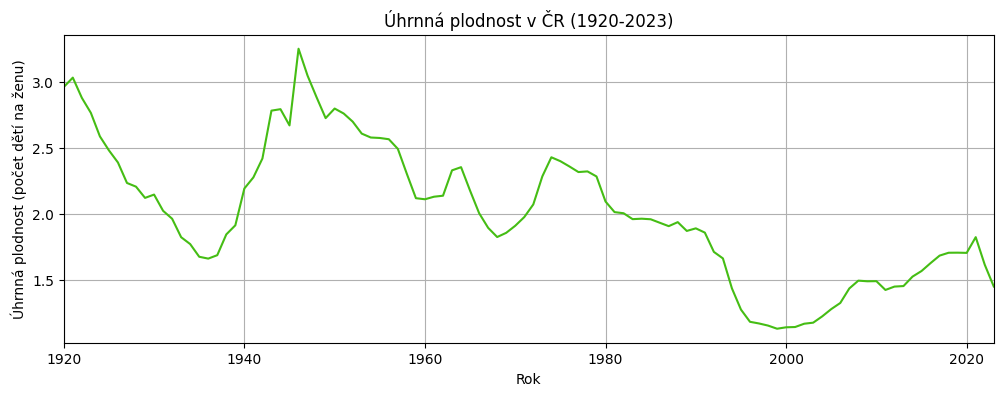

In [99]:
# vizualizace
plt.figure(figsize = (12,4))

plt.plot(df_demograf_pivot["Roky"],df_demograf_pivot["Úhrnná plodnost"],color="#45bd14")

# rozsah os 
# Nechám trochu prostoru pod minimem i nad maximem zkoumaných hodnot, roky ale zobrazím přesně od min do max.
plt.ylim(min_uhrnna_plodnost - (rozpeti_uhrnna_plodnost/20), max_uhrnna_plodnost + (rozpeti_uhrnna_plodnost/20)) 
plt.xlim(df_demograf_pivot["Roky"].min(),df_demograf_pivot["Roky"].max())

plt.title("Úhrnná plodnost v ČR (1920-2023)")
plt.xlabel("Rok")
plt.ylabel("Úhrnná plodnost (počet dětí na ženu)")

plt.grid()

plt.show()

### Průměrný věk při 1. sňatku / při narození 1. dítěte

In [134]:
# filtrace vybraných sloupců
df_demograf_prvni = df_demograf_pivot[["Roky","Průměrný věk žen při prvním sňatku","Průměrný věk mužů při prvním sňatku",
                                      "Průměrný věk matek při narození 1. dítěte"]]

In [147]:
# ověření počtu null hodnot
df_demograf_prvni.isnull().sum()

Ukazatel
Roky                                          0
Průměrný věk žen při prvním sňatku           41
Průměrný věk mužů při prvním sňatku          41
Průměrný věk matek při narození 1. dítěte     5
dtype: int64

In [150]:
# Chci vizualizovat/porovnat společně všechny 3 ukazatele, potřebuji tedy pouze roky s dostupnými daty pro všechny 3.
# Odstraním řádky, v nichž chybí alespoň 1 hodnota za daný rok.
df_demograf_prvni = df_demograf_prvni.dropna()

In [161]:
# příprava rozsahu osy y
# Vybírám nejnižší a nejvyšší hodnotu (věk) ze všech 3 sloupců společně.
min_vek_prvni = df_demograf_prvni[["Průměrný věk žen při prvním sňatku","Průměrný věk mužů při prvním sňatku",
                                 "Průměrný věk matek při narození 1. dítěte"]].min().min()
max_vek_prvni = df_demograf_prvni[["Průměrný věk žen při prvním sňatku","Průměrný věk mužů při prvním sňatku",
                                 "Průměrný věk matek při narození 1. dítěte"]].max().max()
rozpeti_vek_prvni = max_vek_prvni - min_vek_prvni

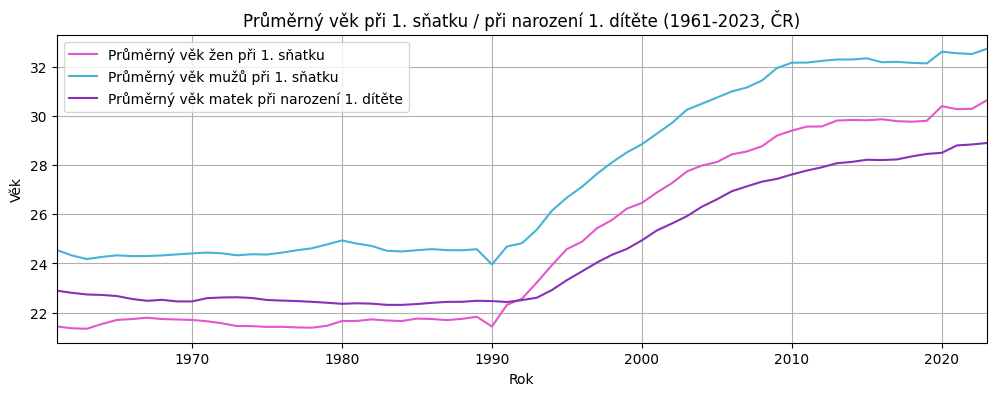

In [226]:
# vizualizace
plt.figure(figsize = (12,4))

plt.plot(df_demograf_prvni["Roky"],df_demograf_prvni["Průměrný věk žen při prvním sňatku"],label="Průměrný věk žen při 1. sňatku",color='#e456ce')
plt.plot(df_demograf_prvni["Roky"],df_demograf_prvni["Průměrný věk mužů při prvním sňatku"],label="Průměrný věk mužů při 1. sňatku",color='#47b2d8')
plt.plot(df_demograf_prvni["Roky"],df_demograf_prvni["Průměrný věk matek při narození 1. dítěte"],label="Průměrný věk matek při narození 1. dítěte",
         color="#8631b8")

# rozsah os
# Nechám trochu prostoru pod minimem i nad maximem zkoumaných hodnot, roky ale zobrazím přesně od min do max.
plt.ylim(min_vek_prvni - (rozpeti_vek_prvni/20), max_vek_prvni + (rozpeti_vek_prvni/20))
plt.xlim(df_demograf_prvni["Roky"].min(), df_demograf_prvni["Roky"].max())

plt.title("Průměrný věk při 1. sňatku / při narození 1. dítěte (1961-2023, ČR)")
plt.xlabel("Rok")
plt.ylabel("Věk")
plt.legend()

plt.grid()

plt.show()

### Živě narození

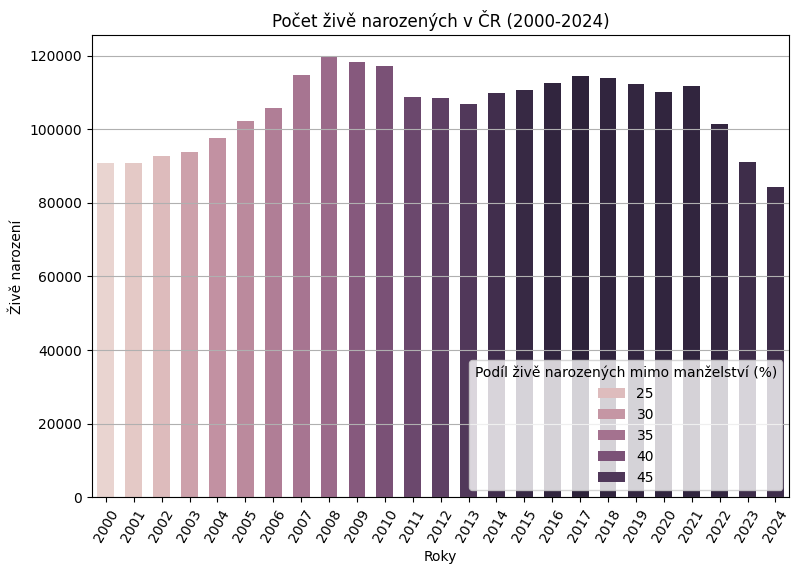

In [11]:
# vizualizace
plt.figure(figsize = (9,6))

ax = sns.barplot(
    data = df_narozeni_pivot,
    x = "Roky",
    y = "Živě narození",
    hue = "Podíl živě narozených mimo manželství (%)", # odstín
    width = 0.6,
    errorbar = None # skryju error bars
)

plt.grid(axis = 'y') # zobrazím pouze horizontální mřížku
plt.xticks(rotation = 60) # nakloním popisky let na ose x, aby se lépe vešly
plt.title("Počet živě narozených v ČR (2000-2024)")

sns.move_legend(ax, "lower right") # přesunu legendu, aby nebránila jednoduché čitelnosti dat z grafu